In [ ]:
# Batch size가 크다면 Learning Rate는 작게 설정하고, Batch size가 작다면 Learning rate를 크게 설정하는 것이 좋다.
# Data의 크기가 크다면 Batch size는 크게 설정, Data의 크기가 작다면 Batch size는 작게 설정.

# Batch size도 Learning Rate, Epoch 못지않은 Hyper Parameter이다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 임의의 Data 개수를 넣어줌.
N = 3000 

x = np.array(np.random.rand(N))
y = 10.0 * np.array(x + 0.05 * np.random.randn(N)) + 10.0
# y = 10x + 10, (w = 10, b = 10)

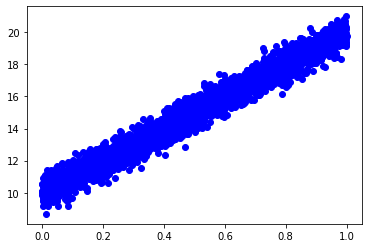

In [ ]:
plt.plot(x, y, linestyle='None', marker='o', color='b')
plt.show()

In [ ]:
w = np.random.rand()
b = np.random.rand()

print(w, b)

0.6662139397380769 0.676236419069202


In [ ]:
def hypothesis(w, b, x):
    return (w * x + b)

def cost_function(h, y):
    err = (h - y) ** 2
    return np.mean(err)

In [ ]:
alpha = 1e-2
epoch = 10000

cost_list = []
for i in range(epoch):
    h = hypothesis(w, b, x)
    cost = cost_function(h, y)
    cost_list.append(cost)

    w = w - alpha * np.mean((h - y) * x)
    b = w - alpha * np.mean(h - y)

cost_list = np.array(cost_list)

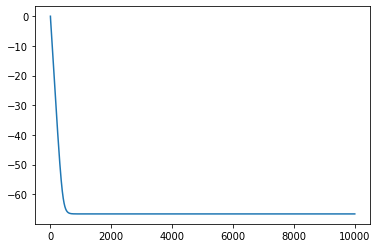

In [ ]:
plt.plot(10.0 * np.log(cost_list / (np.max(cost_list) + 1e-5)))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

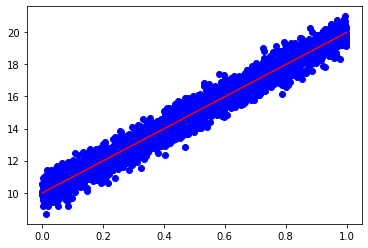

In [ ]:
x_test = np.linspace(0, 1, N)
y_pred = hypothesis(w, b, x_test)

plt.plot(x, y, linestyle='None', marker='o', color='b')
plt.plot(x_test, y_pred, color='r')
plt.show

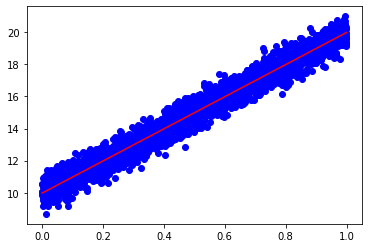

In [ ]:
# scikit-learn 활용
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x.reshape(-1, 1), y.reshape(-1,))
# 앞전의 상당한 양의 코드들이 이 한줄이면 완료됨. 무쳐버린 캡슐화 ㄷㄷ

x_test = np.linspace(0, 1, N)
y_pred = reg.predict(x_test.reshape(-1, 1))

plt.plot(x, y, linestyle='None', marker='o', color='blue'ㄷ
plt.plot(x_test, y_pred, color='red')
plt.show()

In [ ]:
# scikit-learn, SGDRegressor 사용
# Gradient Decent 사용
from sklearn.linear_model import SGDRegressor

def MSE(y_true, y_pred):
    err = (y_true - y_pred) ** 2
    return np.mean(err)

reg = SGDRegressor(alpha=alpha)
loss = []

for i in range(epoch):
    reg.partial_fit(x.reshape(-1, 1), y.reshape(-1,))
    y_pred = reg.predict(x.reshape(-1, 1))
    loss.append(MSE(y, y_pred)) # L그래프로 그리기 위해서 사용

loss = np.array(loss)

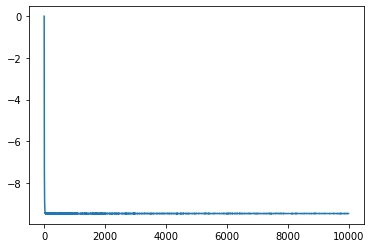

In [ ]:
plt.plot(10.0 * np.log(loss / (np.max(loss) + 1e-5)))
plt.show()

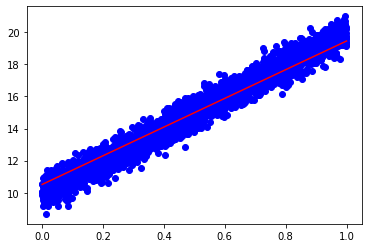

In [ ]:
x_test = np.linspace(0, 1, N)
y_pred = reg.predict(x_test.reshape(-1, 1))

plt.plot(x, y, linestyle='None', marker='o', color='blue')
plt.plot(x_test, y_pred, color='red')
plt.show()